# CONVOLUTIONAL NUERAL NETWORK - MNIST - KERAS

This is a simple CNN architecture to classify the MNIST dataset to acheive an accuracy of 99%+ accuracy. It is a perfect starter dataset to work on and get used to things.

Credits : Yassine Ghouzam, PhD <br>
Link    : https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/data#Introduction-to-CNN-Keras---Acc-0.997-(top-8%)     <br>
Level   : Beginner

## 1) Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white',context='notebook',palette='deep')

Using TensorFlow backend.


## 2) Read the dataset (Train and Test)

In [2]:
train = pd.read_csv("C:/Users/Vignesh/Desktop/Codes/KerasCNN/Data/train.csv")
test = pd.read_csv("C:/Users/Vignesh/Desktop/Codes/KerasCNN/Data/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

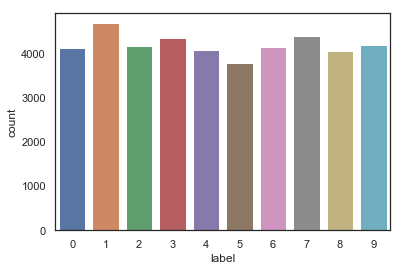

In [3]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis=1)
del train

g=sns.countplot(Y_train)
Y_train.value_counts()

## 3) Check for Nulls

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## 4) Data Preprocessing 

In [6]:
X_train=X_train/255.0
test=test/255.0

In [7]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [8]:
Y_train = to_categorical(Y_train, num_classes=10)

In [9]:
random_seed = 2

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

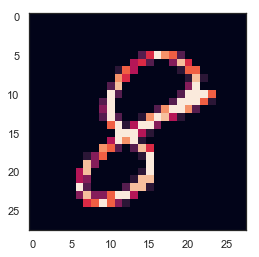

In [11]:
plt.imshow(X_train[0][:,:,0])

## 5) Define the Model using Keras-Sequential

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 6) Define the Optimizer, Loss, Metrics, Learning Rate Redn., Epoch and Mini-batch size

In [13]:
optimizer= RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [14]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

## 7) Data Augmentation

In [17]:
datagen=ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False)
datagen.fit(X_train)

## 8) Training the Model

In [18]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs=epochs,validation_data=(X_val,Y_val),
                              verbose=1,steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
439/439 [==============================] - 180s 410ms/step - loss: 0.4137 - acc: 0.8696 - val_loss: 0.0818 - val_acc: 0.9745
Epoch 2/30
439/439 [==============================] - 183s 418ms/step - loss: 0.1316 - acc: 0.9601 - val_loss: 0.0436 - val_acc: 0.9869
Epoch 3/30
439/439 [==============================] - 199s 452ms/step - loss: 0.0960 - acc: 0.9719 - val_loss: 0.0327 - val_acc: 0.9895
Epoch 4/30
439/439 [==============================] - 191s 435ms/step - loss: 0.0793 - acc: 0.9768 - val_loss: 0.0297 - val_acc: 0.9924
Epoch 5/30
439/439 [==============================] - 205s 466ms/step - loss: 0.0714 - acc: 0.9795 - val_loss: 0.0288 - val_acc: 0.9907
Epoch 6/30
439/439 [==============================] - 189s 430ms/step - loss: 0.0675 - acc: 0.9804 - val_loss: 0.0253 - val_acc: 0.9914
Epoch 7/30
439/439 [==============================] - 200s 455ms/step - loss: 0.0600 - acc: 0.9817 - val_loss: 0.0444 - val_acc: 0.9867


## 9) Plotting the Loss and Accuracy

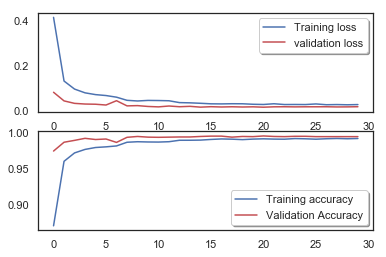

In [21]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training loss')
ax[0].plot(history.history['val_loss'],color='r',label='validation loss',axes=ax[0])
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['acc'],color='b',label='Training accuracy')
ax[1].plot(history.history['val_acc'],color='r',label='Validation Accuracy')
legend=ax[1].legend(loc='best',shadow=True)

## 10) Confusion Matrix

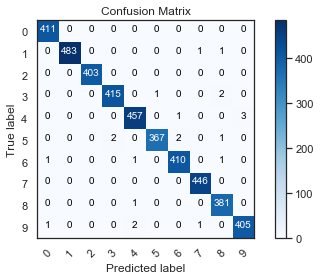

In [35]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
Y_pred=model.predict(X_val)

Y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(Y_val,axis=1)

confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
plot_confusion_matrix(confusion_mtx,classes=range(10))

## 11) Saving the Model

In [57]:
model.save('KerasCNNmodel.h5')

## 12) Analyzing Errors

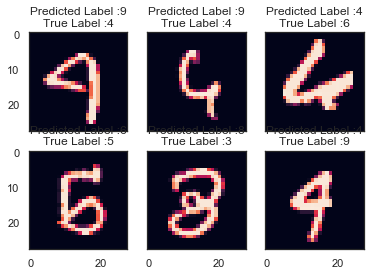

In [65]:
errors=(Y_pred_classes - Y_true !=0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors  = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors,obs_errors):
    n=0
    nrows=2
    ncols=3
    fig,ax=plt.subplots(nrows,ncols,sharex=True,sharey=True)
    
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted Label :{}\nTrue Label :{}".format(pred_errors[error],obs_errors[error]))
            n+=1
Y_pred_errors_prob = np.max(Y_pred_errors,axis=1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors,Y_true_errors,axis=1))
delta_pred_true_errors=Y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_imposrtant_errors=sorted_dela_errors[-6:]

display_errors(most_important_errors,X_val_errors,Y_pred_classes_errors,Y_true_errors)

## 13) Saving Results into csv file

In [72]:
results=model.predict(test)
results=np.argmax(results,axis=1)
results=pd.Series(results,name="Label")

In [68]:
print(results)

0        2
1        0
2        9
3        0
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [71]:
submission=pd.concat([pd.Series(range(1,28001),name='ImageID'),results],axis=1)
submission.to_csv("KerasCNNdatagen.csv",index=False)